In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import math

In [3]:
df = pd.read_csv('insurance_data2.csv')

In [4]:
df.head()

,age_old,insured_old,age_new,Insured_1,Insured_2,Insured_3,Insured_Best
0,22.0,0.0,69,1,0,1,1
1,25.0,0.0,73,1,0,1,1
2,52.0,0.0,33,0,0,0,0
3,55.0,0.0,10,0,1,0,0
4,18.0,0.0,73,1,0,1,1


In [5]:
df1 = df[['age_new', 'Insured_1', 'Insured_2', 'Insured_3', 'Insured_Best']]
df1.head()

,age_new,Insured_1,Insured_2,Insured_3,Insured_Best
0,69,1,0,1,1
1,73,1,0,1,1
2,33,0,0,0,0
3,10,0,1,0,0
4,73,1,0,1,1


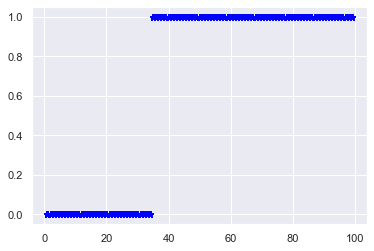

In [6]:
plt.scatter(df1.age_new,df.Insured_1, marker='*', color='blue')

## **Logistic Regression Model**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df1[['age_new']],df1.Insured_1,test_size=0.2)

In [8]:
# Build Linear Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_predicted = model.predict(X_test)

In [10]:
model.score(X_test, y_test)

1.0

In [11]:
coeff_ = model.coef_
inter_ = model.intercept_
coeff_ = coeff_[0][0]
inter_ = inter_[0]
print(coeff_, '\n', inter_)

5.165868523247099 
 -178.23814626095296


(-2.0, 2.0)

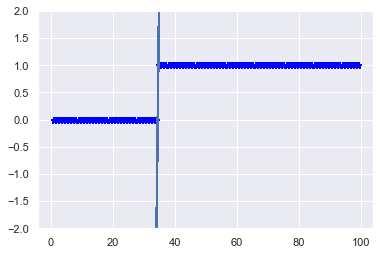

In [12]:
plt.scatter(df1.age_new, df1.Insured_1, marker='*', color='blue')
plt.plot(df1.age_new,    df1.age_new * coeff_ + inter_  )
plt.ylim(bottom=-2, top=2)

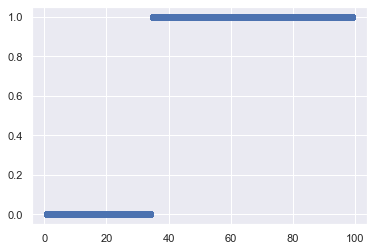

In [14]:
plt.scatter(X_test, model.predict(X_test))

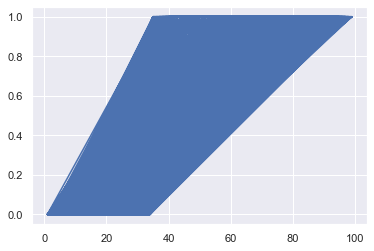

In [13]:
plt.plot(X_test, model.predict(X_test))

In [18]:
def sigmoid(x,coeff,intercept):
    res = coeff * x + intercept
    res = 1/(1+math.exp(-res))
    return res

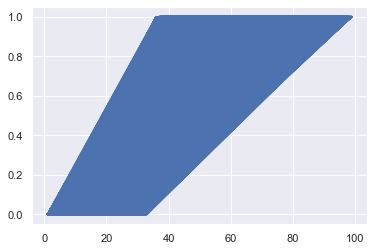

In [19]:
#plt.scatter(df1.age_new, df1.Insured_1, marker='*', color='blue')
plt.plot(df1.age_new,    df1.age_new.apply(sigmoid, coeff=coeff_, intercept=inter_))

In [15]:
def sigmoid(z):
  return 1.0/(1 + math.e ** (-z))

x = [i for i in X_test]
y = [sigmoid(z) for z in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Sigmoid')




TypeError: bad operand type for unary -: 'str'

In [29]:
ddtest        = pd.DataFrame()
ddtest['age'] = X_test['age_new']
ddtest['sigmoid'] = ddtest['age'].apply(sigmoid)
ddtest.head()

,age,sigmoid
1937,49,1.0
8114,23,1.0
6060,26,1.0
3325,19,1.0
1745,24,1.0


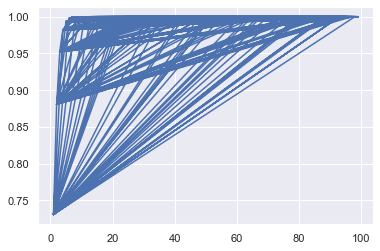

In [31]:
plt.plot(ddtest.age, ddtest.sigmoid)

In [20]:
df1['Insured_1S'] = df1.age_new.apply(sigmoid, coeff=coeff_, intercept=inter_)
df1.head()

<ipython-input-20-fc01100501a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Insured_1S'] = df1.age_new.apply(sigmoid, coeff=coeff_, intercept=inter_)


,age_new,Insured_1,Insured_2,Insured_3,Insured_Best,Insured_1S
0,69,1,0,1,1,1.000000e+00
1,73,1,0,1,1,1.000000e+00
2,33,0,0,0,0,3.601440e-04
3,10,0,1,0,0,3.452974e-57
4,73,1,0,1,1,1.000000e+00


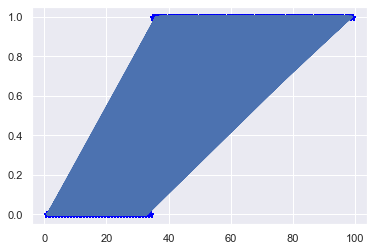

In [21]:
plt.scatter(df1.age_new, df1.Insured_1, marker='*', color='blue')
plt.plot(df1.age_new,    df1.Insured_1S)

In [ ]:
def sigmoid2(x):
  return 1/(1+math.exp(-x))

In [ ]:
sigmoid2(10)

0.9999546021312976

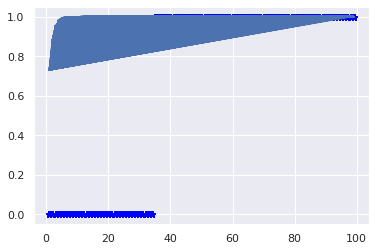

In [ ]:
plt.scatter(df1.age_new, df1.Insured_1, marker='*', color='blue')
plt.plot(df1.age_new,    df1.age_new.apply(sigmoid2))

In [ ]:
def sigmoid3(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

In [ ]:
yvals = sigmoid3(df1.age_new.values)
yvals[:5]

[1.0, 1.0, 0.9999999999999953, 0.9999546021312976, 1.0]

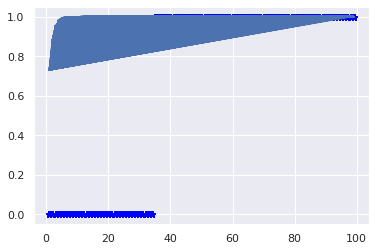

In [ ]:
plt.scatter(df1.age_new, df1.Insured_1, marker='*', color='blue')
plt.plot(df1.age_new,    yvals)

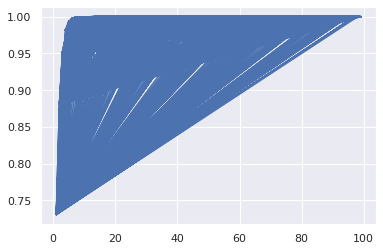

In [ ]:
plt.plot(df1.age_new,    yvals)

In [ ]:
Xaxis = np.arange(-10., 10., 0.2)
Yaxis = np.linspace(0, len(Xaxis), len(Xaxis))

In [ ]:
Xaxis[:5]

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2])

In [ ]:
Yaxis[:5]

array([0.        , 1.01010101, 2.02020202, 3.03030303, 4.04040404])

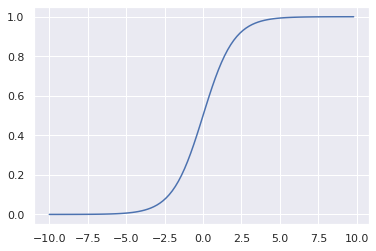

In [ ]:
plt.plot(Xaxis, sigmoid3(Xaxis))

In [ ]:
def sigmoid(x,coeff,intercept):
    res = coeff * x + intercept
    res = 1/(1+math.exp(-res))
    return res

In [ ]:
# df1['Insured_BestF'] = df1.Insured_Best.apply(sigmoid, 2, 3)
type(sigmoid(10, 2, 3))

float

In [ ]:
df1['Insured_BestF'] = df1.Insured_Best.apply(sigmoid, coeff=2, intercept=3)
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age_new,Insured_1,Insured_2,Insured_3,Insured_Best,Insured_BestF
0,69,1,0,1,1,0.993307
1,73,1,0,1,1,0.993307
2,33,0,0,0,0,0.952574
3,10,0,1,0,0,0.952574
4,73,1,0,1,1,0.993307


In [ ]:
plt.scatter(df1.age_new,df.Insured_1, marker='*', color='blue')
plt.plot(df1.age_new, df1.age.apply(sigmoid, coeff))

In [ ]:
def sigmoid(data,col, coeff,intercept):
    for i in range(0, len(data.iloc[:, col])):
        item = data.iloc[i, col]
        res = coeff * item + intercept
        res = 1/(1+math.exp(-res))
        
    
    return res

In [ ]:
sigmoid(df1, 3, 1,1)

In [ ]:
df1.loc[0, 1] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
df1.iloc[0,1]

0

In [ ]:
datadf = pd.DataFrame({'Username':['AA', 'BB', 'CC', 'DD', 'EE', 'FF'], 'Score':[10, 20, 15, 30, 35, 45]})
datadf.head()

,Username,Score
0,AA,10
1,BB,20
2,CC,15
3,DD,30
4,EE,35


In [ ]:
def testfunc(x, n):
  res = x * n
  res = res ** 2
  return res

In [ ]:
datadf.Score.apply(testfunc, n=2)

0     400
1    1600
2     900
3    3600
4    4900
5    8100
Name: Score, dtype: int64